In [0]:
from google.colab import files

In [0]:
# Install Kaggle library
!pip install -q kaggle

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"anmolgulati10","key":"4afd3de52799fe2b03f5c82b01e6ced0"}'}

In [0]:
!mkdir -p ~/.kaggle

In [0]:
!cp kaggle.json ~/.kaggle/

In [0]:
# !kaggle datasets list

In [0]:
!kaggle datasets download -d moltean/fruits

 97% 689M/709M [00:07<00:00, 94.6MB/s]
100% 709M/709M [00:07<00:00, 102MB/s] 


In [0]:
!unzip /content/fruits.zip
# !rm -rf /content/fruits-360

In [0]:
#importing necessary modules
import os
from matplotlib.image import imread
from scipy import ndimage, misc
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#appending the images and labels of images in list 
y = []
x = []
for fruits in os.listdir('/content/fruits-360/Training'):
    for image in os.listdir(f"/content/fruits-360/Training/{fruits}"):
        X=imread(f"/content/fruits-360/Training/{fruits}/{image}")
        x.append(X)
        y.append(fruits)

In [0]:
#appending image of each type in list
y_ = []
x_ = []
for fruits in os.listdir('/content/fruits-360/Training'):
    for image in os.listdir(f"/content/fruits-360/Training/{fruits}"):
        X=imread(f"/content/fruits-360/Training/{fruits}/{image}")
        x_.append(X)
        y_.append(fruits)
        break

In [0]:
#checking shape of unique images 
x_=np.array(x_)
x_.shape

(114, 100, 100, 3)

In [0]:
#checking shape of actual image dataset
x=np.array(x)
x.shape

(57276, 100, 100, 3)

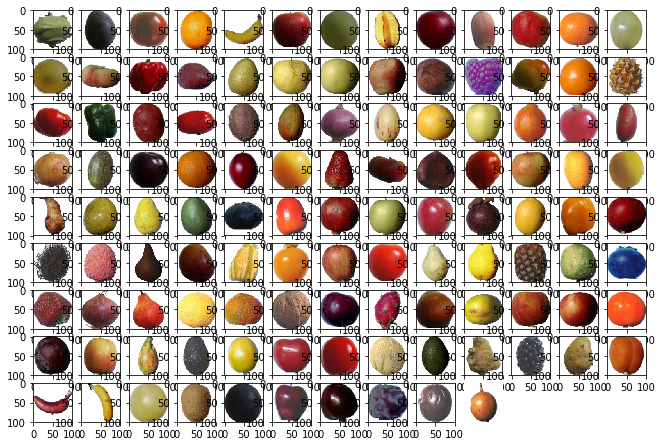

In [0]:
#plotting each type of fruit in the dataset
fig=plt.figure(figsize=(11,11))
for i in range(len(x_)):
    ax=fig.add_subplot(13,13,i+1)
    ax.imshow(x_[i])
plt.axis('off')
plt.show()

In [0]:
#reshaping the x
x = x.reshape(57276, 30000)

In [0]:
x.shape

(57276, 30000)

In [0]:
#importing dimension reduction module
from sklearn.decomposition import PCA,IncrementalPCA

In [0]:
#applying PCA technique on our dataset
n_batches=50
o=0
inc_pca=IncrementalPCA()
for x_batch in np.array_split(x,n_batches):
    inc_pca.partial_fit(x_batch)
    print(o)
    o+=1

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/incremental_pca.py:294: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [0]:
#checking components shape  
inc_pca.components_.shape

(1146, 30000)

In [0]:
#transforming the data into PCA transformed data
x_data=inc_pca.transform(x)

In [0]:
x_data.shape

(57276, 1146)

In [0]:
import pandas as pd
x_data1=pd.DataFrame(x_data)
x_data1.to_csv('x_data.csv',index=False)

In [0]:
#importing kmeans clustering
from sklearn.cluster import KMeans

In [0]:
#fitting the data
kmeans = KMeans(n_clusters = 10)
kmeans.fit(x_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
#converting the data for preprocessing
visual_data=np.concatenate((x_data[:,0:4],(kmeans.labels_).reshape(-1,1)),axis=1)
visual_data=pd.DataFrame(visual_data)
visual_data.columns=['a','b','c','d','y']

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


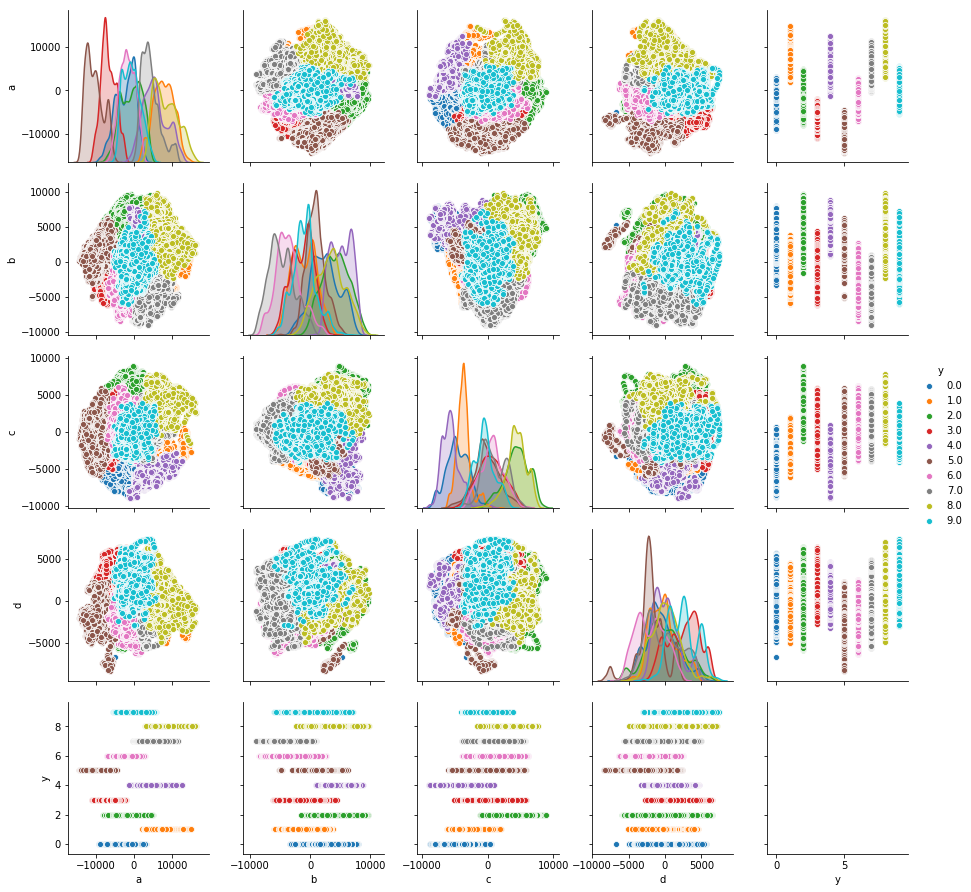

In [0]:
#plotting pairplot to showcase cluster formation
sns.pairplot(visual_data,hue='y')

In [0]:
#storing kmeans cluster centers
d=kmeans.cluster_centers_

In [0]:
#applying inverse transform on centers
centroid_points=inc_pca.inverse_transform(d)

In [0]:
centroid_points.shape

(10, 30000)

In [0]:
#reshaping centroid points to plot them
m=centroid_points.reshape(-1,100,100,3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

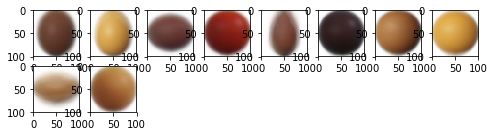

In [0]:
#plotting cluster centers to showcase what type of shape and color of image is grouped together 
fig=plt.figure(figsize=(8,8))
for i in range(len(m)):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(m[i]/255)
plt.show()

In [0]:
for i in range(len(set(kmeans.labels_))):
  x=(kmeans.labels_==i)
  print(f'the number of images in {i} cluster is =',list(x).count(True))

the number of images in 0 cluster is = 5918
the number of images in 1 cluster is = 4571
the number of images in 2 cluster is = 6994
the number of images in 3 cluster is = 5509
the number of images in 4 cluster is = 3354
the number of images in 5 cluster is = 5604
the number of images in 6 cluster is = 7076
the number of images in 7 cluster is = 8245
the number of images in 8 cluster is = 4341
the number of images in 9 cluster is = 5664
